# Problem Statement

A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All Libraries imported")

All Libraries imported


# Importing the dataset

In [3]:
data=pd.read_excel("restaurants.xlsx")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [4]:
Country=pd.read_excel('Country-Code.xlsx')
Country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
Country.dtypes

Country Code     int64
Country         object
dtype: object

In [6]:
rest=pd.merge(data,Country,on='Country Code',how='left')
rest.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


# Preliminary Analysis

In [7]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
rest.shape

(9551, 20)

In [9]:
rest.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

we observe restaurant name has 1 null value

In [10]:
#Checking the null value for Restaurant name

rest[rest['Restaurant Name'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [21]:
# dropping the null Restaurant Name

rest.dropna(axis=0,subset=['Restaurant Name'],inplace=True)
rest.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [22]:
#Checking the null value for Cuisine names

rest[rest['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


In [23]:
# Since there are 9 null values therefore we need to fill them with others

rest['Cuisines'].fillna('Others',inplace=True)

In [24]:
rest.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

We have no more null values

In [25]:
#Checking for duplicates

duplicate=rest[rest.duplicated()]
duplicate


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


There are no duplicates

# Performing EDA

# Exploring the geographical distribution of the restaurants 

In [26]:
Geog_dist=rest.groupby(["Country Code","Country"]).agg(Count=('Restaurant ID','count'))
Geog_dist.sort_values(by='Count',ascending=False)

,,Count
Country Code,Country,
1,India,8651
216,United States,434
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


# Identifying the cities with the maximum and minimum number of restaurants

In [27]:
max_rest=rest.groupby(['Country','City']).agg(Count=('Restaurant ID','count'))
max_rest.sort_values(by='Count',ascending=False)

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

New Delhi has the maximum number of restaurants= 5473

In [28]:
min_rest=rest.groupby(['Country','City']).agg(Count=("Restaurant ID","count"))
min_rest.sort_values(by='Count',ascending=False)

                                                           

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

In [29]:
# Now checking how many cities have the lowest restaurant 

min_ncities=min_rest[min_rest['Count']==1]
min_ncities

Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [30]:
min_ncities.count()

Count    46
dtype: int64

There are 46 Cities in 7 countries with minimum restaurant i.e 1

# Exploring how ratings are distributed overall.

In [31]:
max_ratings=rest.sort_values(by='Aggregate rating',ascending=False).groupby(['Country','City'],as_index=False).first()

In [32]:
min_ratings=rest.sort_values(by='Aggregate rating',ascending=False).groupby(['Country','City'],as_index=False).last()

In [33]:
df_max=max_ratings[['Country','City','Restaurant Name','Aggregate rating']]

In [34]:
df_min=min_ratings[['Country','City','Restaurant Name','Aggregate rating']]

In [35]:
rest_ratings=df_max.merge(df_min,left_on='City',right_on="City",how="inner")
rest_ratings

,Country_x,City,Restaurant Name_x,Aggregate rating_x,Country_y,Restaurant Name_y,Aggregate rating_y
0,Australia,Armidale,Whitebull Hotel,3.5,Australia,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Australia,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Australia,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,Australia,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,Australia,The Belle General,4.1
...,...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,United States,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,United States,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,United States,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,United States,Theo Yianni's Authentic Greek Restaurant,3.9


In [36]:
rest_ratings.drop(columns='Country_y',axis=1,inplace=True)
rest_ratings.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
rest_ratings

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


# Finding out the ratio between restaurants that allow table booking vs. those that do not allow table booking

In [37]:
dummy = ['Has Table booking','Has Online delivery']
rest = pd.get_dummies(rest,columns=dummy,drop_first=True)


In [38]:
rest.head()

# 0 indicates No
#1 indicates Yes

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Has Table booking_Yes,Has Online delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [39]:
table_booking=rest[rest['Has Table booking_Yes']==1]['Restaurant ID'].count()
table_nbooking=rest[rest['Has Table booking_Yes']==0]['Restaurant ID'].count()
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      round((table_booking/table_nbooking),2))

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


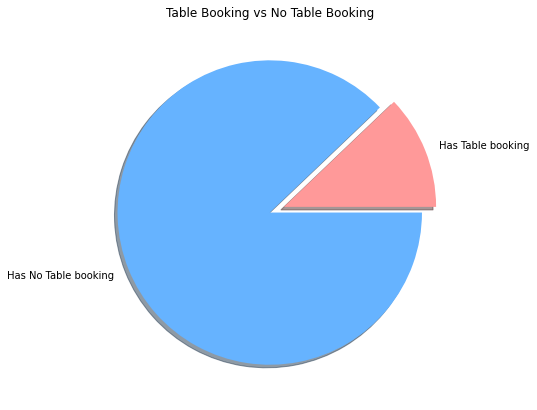

In [40]:
#Creating a pie chart to show the above ratio

fig = plt.figure(figsize =(10, 7))
sizes=[table_booking,table_nbooking]
plt.title('Table Booking vs No Table Booking')
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels = ['Has Table booking','Has No Table booking'],shadow=True,colors=colors,explode=(0.1,0))
 
# show plot
plt.show()

# Finding out the percentage of restaurants providing online delivery

In [41]:
online_del=rest[rest['Has Online delivery_Yes']==1]['Restaurant ID'].count()
online_ndel=rest[rest['Has Online delivery_Yes']==0]['Restaurant ID'].count()
print('Percentage of restaurants providing online delivery : {} %'.format((round(online_del/len(rest),3)*100)))

Percentage of restaurants providing online delivery : 25.7 %


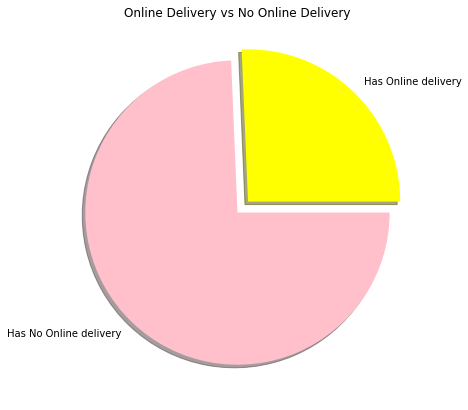

In [42]:
#Creating a pie chart to show the above ratio

fig=plt.figure(figsize=(10,7))
sizes=[online_del,online_ndel]
plt.title("Online Delivery vs No Online Delivery")
colors=['yellow','pink']
plt.pie(sizes, labels = ['Has Online delivery','Has No Online delivery'],shadow=True,colors=colors,explode=(0.1,0))
 
plt.show()


In [43]:
#Percentage of restaurants providing online delivery is 25.7%
#Percentage of restaurants not providing online delivery is 74.3%

# Calculating the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [44]:
votes_del=rest[rest['Has Online delivery_Yes']==1]['Votes'].sum()
votes_ndel=rest[rest['Has Online delivery_Yes']==0]['Votes'].sum()
print('The difference in number of  votes for the restaurants that deliver and the restaurants that do not deliver:',
      abs(votes_del-votes_ndel))

The difference in number of  votes for the restaurants that deliver and the restaurants that do not deliver: 462048


In [45]:
print(votes_del,votes_ndel)

517914 979962


([<matplotlib.patches.Wedge at 0x1722f671af0>,
 [Text(0.5589634232699549, 1.0618662304858995, 'Votes for online delivery'),
  Text(-0.5123831379974587, -0.9733773779454078, 'Votes for no online delivery')])

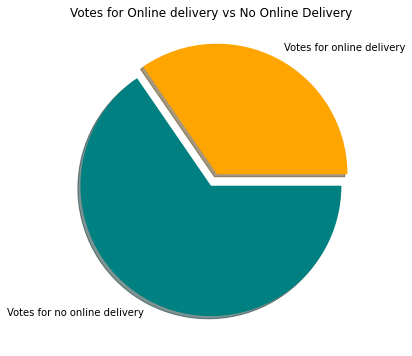

In [46]:
#Creating the pie chart for the above vote

figure=plt.figure(figsize=(9,6))
sizes=[votes_del,votes_ndel]
colors=['Orange','teal']
plt.title('Votes for Online delivery vs No Online Delivery')
plt.pie(sizes,labels=['Votes for online delivery','Votes for no online delivery'],colors=colors,shadow=True,explode=(0.1,0))

In [47]:
# Maximum votes are in the favour of no online delivery

# The most served cuisine across the restaurant for each city



In [48]:
cuisines=rest['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines.columns=["Cuisine_1","Cuisine_2","Cuisine_3","Cuisine_4","Cuisine_5","Cuisine_6","Cuisine_7","Cuisine_8"]

cuisines.tail()


,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9550,Chinese,North Indian,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_cuisines=pd.concat([rest,cuisines],axis=1)
df_cuisines.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking_Yes,Has Online delivery_Yes,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,0,0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,0,0,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,0,0,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,0,0,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,0,0,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cuisines1=pd.DataFrame(df_cuisines[['City','Country','Locality Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8'
                                   ]])

In [51]:
#stacking the columns
cuisines1.stack=pd.DataFrame(cuisines1.stack())
cuisines1.head()

,City,Country,Locality Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Jakarta,Indonesia,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Jakarta,Indonesia,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Jakarta,Indonesia,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Jakarta,Indonesia,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jakarta,Indonesia,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
keys=[c for c in cuisines1 if c.startswith('Cuisine')]

#melting the stack into one row
a=pd.melt(cuisines1, id_vars='Locality Verbose', value_vars=keys, value_name="Cuisines")

#Highest no of restaurant in a city

cuisines_melt=pd.DataFrame(a.groupby(by=['Locality Verbose','variable','Cuisines']).size().reset_index())
cuisines_melt
del cuisines_melt['variable']
cuisines_melt.columns=['Locality Verbose','Cusinies','Count']
cuisines_melt.head()


,Locality Verbose,Cusinies,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [76]:
rest_maxcity=cuisines_melt.sort_values('Count', ascending=False).groupby(by=['Locality Verbose'],as_index=False).first()
rest_maxcity.head()

,Locality Verbose,Cusinies,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


In [54]:
# Joining the dataframes
rest_loc=rest_maxcity.merge(rest,left_on='Locality Verbose',right_on='Locality Verbose',how='inner')

#Creating a new dataframe
df=pd.DataFrame(rest_loc[['Country','City','Locality Verbose','Cuisines','Count']])

#Grouping data by country code
country=rest_loc.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()

#Renaming columns
con=pd.DataFrame(country[['Country','City','Locality','Cuisines','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']

#Sorting values on the basis of number of restaurants in the country
con1=con.sort_values('Number of restaurants in the country', ascending=False) 
con1

con1[:10]
final_con=con1.drop(con1.index[[7,10]])
final_con

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,"North Indian, Mughlai",48
14,United States,Dubuque,Dubuque,"American, Seafood, Steak",9
5,New Zealand,Wellington City,Te Aro,Asian,5
1,Brazil,Rio de Janeiro,Ipanema,"Brazilian, Healthy Food, Juices, Pizza",3
6,Phillipines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Chinese,2
8,Singapore,Singapore,"Marina Centre, Downtown Core","Chinese, Seafood, Cantonese, Dim Sum",2
9,South Africa,Cape Town,Green Point,"Burger, Fast Food, Grill",2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2
0,Australia,Victor Harbor,Victor Harbor,"Coffee and Tea, Tapas, Australian",1


#Thus we get to see the most served cuisines across restaurants in each city
In india ,New Delhi has the most popular North Indian cuisine   serving across 48 restaurants.
In United States , Dubuque has the most popular American cuisines serving across 9 restaurants.

In [58]:
rest_name_cuisine=pd.DataFrame(df_cuisines[['Restaurant Name','City','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8'
                                   ]])

In [65]:
rest_name_cuisine_stack=pd.DataFrame(rest_name_cuisine.stack());
rest_name_cuisine.head()

,Restaurant Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


# Maximum and Minimum number of cuisines that a restaurant serves

In [79]:
keys1 = [c for c in rest_name_cuisine  if c.startswith('Cuisine')]
#melting the stack into one row
b=pd.melt(rest_name_cuisine, id_vars='Restaurant Name', value_vars=keys, value_name='Cuisines') 

#find the highest restuarant in the city
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant Name','variable','Cuisines']).size().reset_index()) 
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant Name','Cuisines','Count']
max_rate1.head(10)


,Restaurant Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [81]:
max_rate1.sort_values('Count',ascending=False)

,Restaurant Name,Cuisines,Count
2479,Cafe Coffee Day,Cafe,83
4596,Domino's Pizza,Pizza,79
4597,Domino's Pizza,Fast Food,78
12984,Subway,Salad,63
12985,Subway,Healthy Food,63
...,...,...,...
5568,Gabbar's Bar & Kitchen,Chinese,1
5569,Gabbar's Bar & Kitchen,Mexican,1
5570,Gabbar's Bar & Kitchen,Italian,1
5571,Gaga Manjero,World Cuisine,1


Hence we observe the following results
Cafe coffee day has the maximum cuisines with the cuisine count 83
Restaurants with count 1 indicates the least cuisine variation


 # Determining the  cost and the ratings distributed among the various factors

In [97]:
df_rest=rest.copy()

In [98]:
rating_cost=df_rest[['Restaurant ID','Restaurant Name','Country','City','Aggregate rating','Average Cost for two',
                      'Votes','Price range','Has Table booking_Yes','Has Online delivery_Yes']]

In [102]:
rating_cost=rating_cost.merge(max_rate1,left_on='Restaurant Name',right_on='Restaurant Name',how='left')
rating_cost

,Restaurant ID,Restaurant Name,Country,City,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking_Yes,Has Online delivery_Yes,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Italian,1
1,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Continental,1
2,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Asian,1
3,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Western,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Italian,1
23811,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Beverages,1
23812,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0,Street Food,1
23813,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,0,0,Chinese,1


,Average Cost for two,Aggregate rating
Average Cost for two,1.00000,0.05011
Aggregate rating,0.05011,1.00000


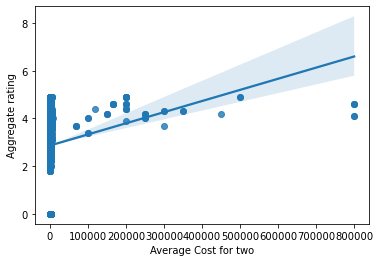

In [103]:
sns.regplot(x='Average Cost for two',y='Aggregate rating', data=rating_cost)
rating_cost[["Average Cost for two", "Aggregate rating"]].corr()

We see that the avereage cost for two is weakly positivr and hence is not a strong factor to decide the rating of a restaurant

,Count,Aggregate rating
Count,1.000000,-0.001642
Aggregate rating,-0.001642,1.000000


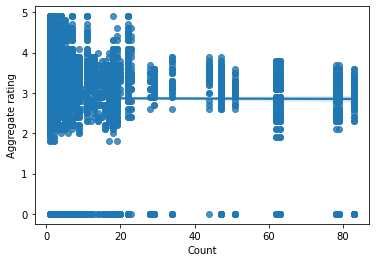

In [105]:
sns.regplot(x='Count',y='Aggregate rating', data=rating_cost)
rating_cost[["Count", "Aggregate rating"]].corr()

We see that number of cusines is not a good factor to determine the Rating of a restaurant

,Votes,Aggregate rating
Votes,1.000000,0.318667
Aggregate rating,0.318667,1.000000


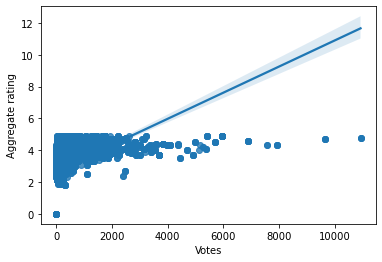

In [108]:
sns.regplot(x='Votes',y='Aggregate rating', data=rating_cost)
rating_cost[["Votes", "Aggregate rating"]].corr()

We see thatcustomer votes can be a good factor to determine the rating of a restaurant

,Has Table booking_Yes,Aggregate rating
Has Table booking_Yes,1.000000,0.181843
Aggregate rating,0.181843,1.000000


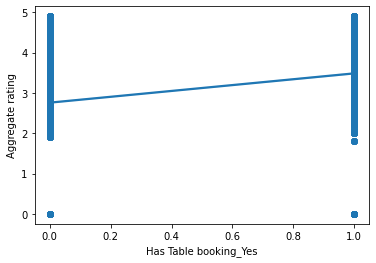

In [112]:
sns.regplot(x='Has Table booking_Yes',y='Aggregate rating',data=rating_cost)
rating_cost[['Has Table booking_Yes','Aggregate rating']].corr()

In [ ]:
We  see that table booking can be a fcator to determine the rating of a restaurant